# Distinctiveness 2

This experiment will use a logistic regression classifier to classify distinctiveness.

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from time import time
import numpy as np

In [70]:
# get features and labels
data = pd.read_pickle('pifsc_embeddings2.pickle')
features = dict(data)
data = pd.read_pickle('pifsc_embeddings.pkl')
features.update(data)

cols = ["species","image","distinctiveness","quality"]
labels1 = pd.read_csv('pifsc_labels_detail.csv')[cols]

cols = ["species","filename","distinctiveness","quality"]
labels2 = pd.read_csv('pifsc_labels2.csv')[cols]
labels2.columns = ["species","image","distinctiveness","quality"]

labels = pd.concat([labels1, labels2]).reset_index(drop=True)

In [71]:
# clean labels
is_na = labels.distinctiveness.isna()
labels = labels.loc[~is_na]
labels = labels.drop_duplicates(subset='image', keep='first')
# labels.reset_index(drop=False, inplace=True)

# clean features
imgs = labels.image.tolist()
features = {k: v for k, v in features.items() if k in imgs}
assert len(features) == len(labels)

In [72]:
# get data, split
Y = labels.distinctiveness
X = np.array([features[i] for i in labels.image])
# species = labels.species.astype('category').cat.codes
# X = np.insert(X, 0, species, axis=1)
# sc = StandardScaler()
# X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, stratify=Y)

In [73]:
# train Logistic regression
model = LogisticRegressionCV(cv=10, max_iter=5000, class_weight='balanced', multi_class='multinomial', n_jobs=-1)
model.fit(X_train, Y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, max_iter=5000,
                     multi_class='multinomial', n_jobs=-1)

In [74]:
# predict
print("Predicting distinctiveness")
t0 = time()
preds = model.predict(X_test)
print("Done in %0.3fs" % (time() - t0))

Predicting distinctiveness
Done in 0.023s


              precision    recall  f1-score   support

         1.0       0.91      0.90      0.90       288
         2.0       0.94      0.95      0.94       586
         3.0       0.38      0.27      0.32        11
         4.0       0.70      0.78      0.74         9

    accuracy                           0.92       894
   macro avg       0.73      0.72      0.72       894
weighted avg       0.92      0.92      0.92       894



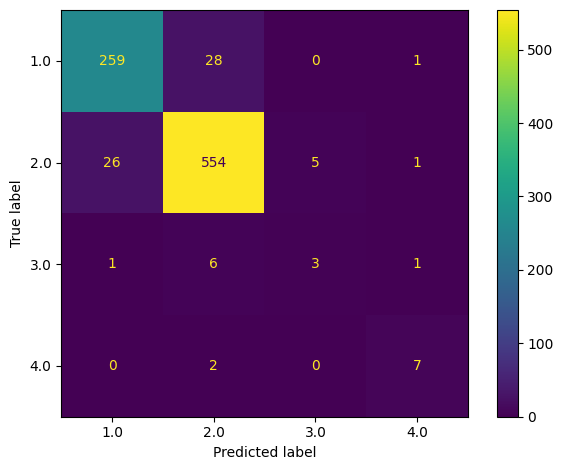

In [75]:
# results
print(classification_report(Y_test, preds))
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
plt.tight_layout()